In [20]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import necessary packages

import os
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [8]:
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Activations
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

In [8]:
#Listing out folder/label names
for item in os.listdir('./seg_train/seg_train'):
    print(item)

forest
buildings
.DS_Store
glacier
street
mountain
sea


NameError: name 'ex_img' is not defined

In [79]:
#Setting up class labels
class_labels=['buildings','forest','glacier','street','mountain','sea']

In [3]:
#Pulling images, resizing and storing in arrays
def get_images(directory):
    Images = []
    Labels = []
    
    for labels in os.listdir(directory):
        if labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'glacier':
            label = 2
        elif labels == 'street':
            label = 3
        elif labels == 'mountain':
            label = 4
        elif labels == 'sea':
            label = 5
        
        print("Now working on: ",labels)

        if not labels.startswith('.DS'):
                  
            for image_file in os.listdir(directory+labels):

                image = cv2.imread(directory+labels+r'/'+image_file)
                image = cv2.resize(image, (150,150))

                Images.append(image)
                Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462)

def get_classlabel(class_code):
    labels={0:'buildings',1:'forest',2:'glacier',3:'street',4:'mountain',5:'sea'}
    return labels[class_code]

In [17]:
#Puling gray version of images
def get_gray_images(directory):
    Images = []
    Labels = []
    
    for labels in os.listdir(directory):
        if labels == 'buildings':
            label = 0
        elif labels == 'forest':
            label = 1
        elif labels == 'glacier':
            label = 2
        elif labels == 'street':
            label = 3
        elif labels == 'mountain':
            label = 4
        elif labels == 'sea':
            label = 5
        
        print("Now working on: ",labels)

        if not labels.startswith('.DS'):
                  
            for image_file in os.listdir(directory+labels):

                image = cv2.imread(directory+labels+r'/'+image_file)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image_gray = cv2.resize(gray, (50,50))

                Images.append(image_gray)
                Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462)

In [4]:
#Scaling Image pixel values
Images,Labels = get_images('./seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Images_scaled = Images/255
Labels = np.array(Labels)
print("Images shape: ",Images.shape)
print("Images (scaled) shape: ",Images_scaled.shape)
print("Labels shape: ",Labels.shape)


Now working on:  forest
Now working on:  buildings
Now working on:  .DS_Store
Now working on:  glacier
Now working on:  street
Now working on:  mountain
Now working on:  sea


In [5]:
Images_scaled = Images/255

In [6]:
print("Images shape: ",Images.shape)
print("Images (scaled) shape: ",Images_scaled.shape)
print("Labels shape: ",Labels.shape)

Images shape:  (14034, 150, 150, 3)
Images (scaled) shape:  (14034, 150, 150, 3)
Labels shape:  (14034,)


In [21]:
Images_RF = Images_scaled.reshape(14034,50*50)

In [22]:
Images_RF.shape

(14034, 2500)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Images_RF,Labels,test_size=0.3)


In [24]:
#Creating RF classifier to check how it works
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
print("Creating RF classifier...")
clf = RandomForestClassifier(n_estimators=100)
print("Training RF classifier...")
clf.fit(X_train,y_train)



Creating RF classifier...
Training RF classifier...


RandomForestClassifier()

In [25]:
print("Making Predictions...")
Y_pred = clf.predict(X_test)
print("Base Accuracy: ",metrics.accuracy_score(y_test,Y_pred))

Making Predictions...
Base Accuracy:  0.5326525765851342


In [11]:
base_acc = metrics.accuracy_score(y_test,Y_pred)

In [10]:
#RandomSearchCV for tuning RF

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [12]:
##### from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
print("Creating RF classifier...")
rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = 4)
print("Training RF classifier...")
rf_random.fit(X_train,y_train)
print("Done training!")
print("Random Search Results:",rf_random.best_params_)
print("Making Predictions...")
Y_pred1 = rf_random.best_params_.predict(X_test)
print("Accuracy of Random Search Optimized: ",metrics.accuracy_score(y_test,Y_pred1))

Creating RF classifier...
Training RF classifier...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
Labels.shape

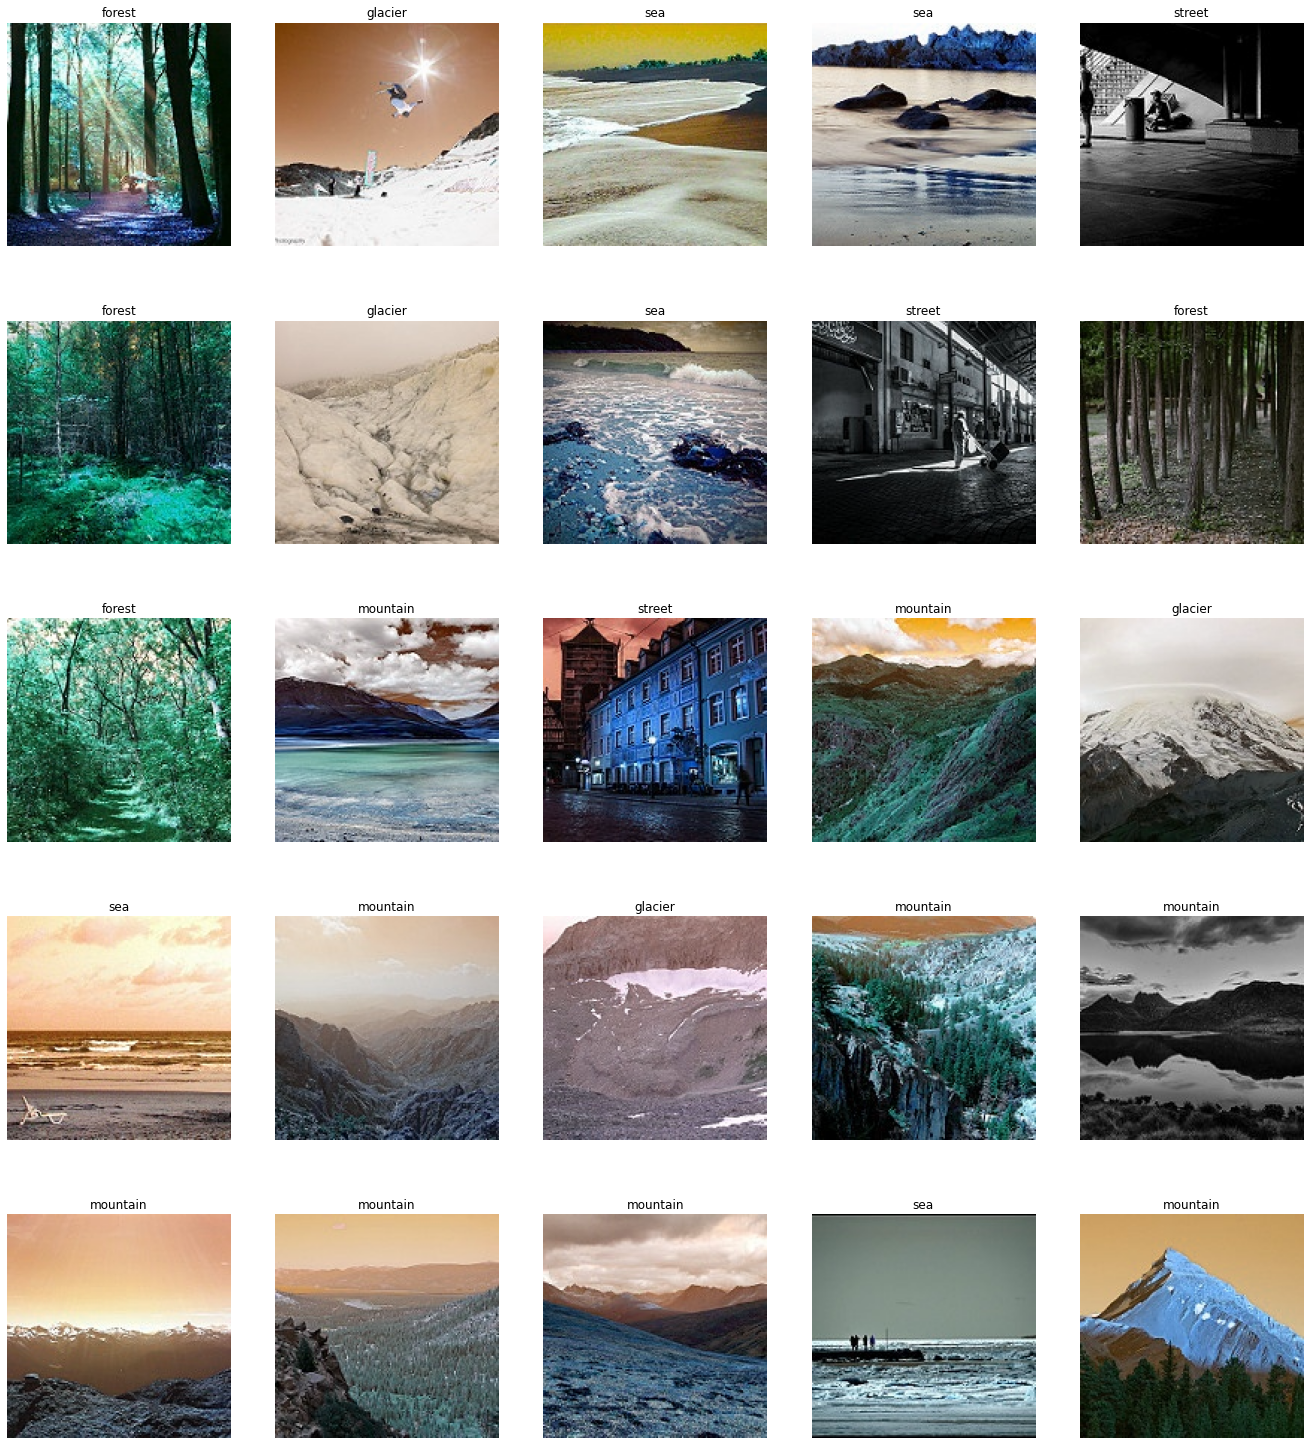

In [7]:
#VIewing sample images
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,5)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images_scaled))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [13]:
Images_scaled=Images/255

In [9]:
#Build CNN Models
# model = Models.Sequential()

# model.add(Layers.Conv2D(filters=300,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
# model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu'))
# model.add(Layers.MaxPool2D(5,5))
# model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
# model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
# model.add(Layers.MaxPool2D(5,5))
# model.add(Layers.Flatten())
# model.add(Layers.Dense(180,activation='relu'))
# model.add(Layers.Dense(100,activation='relu'))
# model.add(Layers.Dense(50,activation='relu'))
# model.add(Layers.Dropout(rate=0.5))
# model.add(Layers.Dense(6,activation='softmax'))

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Utils.plot_model(model,to_file='model.png',show_shapes=True)
#Utils.plot_model(model,to_file="model.png")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [10]:
trained=model.fit(Images_scaled,Labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 81s 896ms/step - loss: 1.4129 - accuracy: 0.4442 - val_loss: 0.8555 - val_accuracy: 0.6876
Epoch 2/20
88/88 [==============================] - 73s 834ms/step - loss: 0.7462 - accuracy: 0.7299 - val_loss: 0.7637 - val_accuracy: 0.7093
Epoch 3/20
88/88 [==============================] - 71s 808ms/step - loss: 0.6077 - accuracy: 0.7777 - val_loss: 0.7724 - val_accuracy: 0.7328
Epoch 4/20
88/88 [==============================] - 70s 794ms/step - loss: 0.3955 - accuracy: 0.8677 - val_loss: 0.6787 - val_accuracy: 0.7695
Epoch 5/20
88/88 [==============================] - 70s 800ms/step - loss: 0.2532 - accuracy: 0.9219 - val_loss: 0.7611 - val_accuracy: 0.7524
Epoch 6/20
88/88 [==============================] - 71s 808ms/step - loss: 0.1539 - accuracy: 0.9572 - val_loss: 0.8572 - val_accuracy: 0.7485
Epoch 7/20
88/88 [==============================] - 71s 804ms/step - loss: 0.1092 - accuracy: 0.9716 - val_loss: 0.9295 - val_accuracy: 0.7613

In [17]:
#Build 2nd Model
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax')
])

model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)       

In [18]:
trained2=model2.fit(Images_scaled,Labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 157s 2s/step - loss: 1.3600 - accuracy: 0.5560 - val_loss: 60.7479 - val_accuracy: 0.1521
Epoch 2/20
88/88 [==============================] - 141s 2s/step - loss: 0.7129 - accuracy: 0.7424 - val_loss: 155.3734 - val_accuracy: 0.1521
Epoch 3/20
88/88 [==============================] - 138s 2s/step - loss: 0.5588 - accuracy: 0.7946 - val_loss: 291.3507 - val_accuracy: 0.1521
Epoch 4/20
88/88 [==============================] - 138s 2s/step - loss: 0.4386 - accuracy: 0.8454 - val_loss: 481.1708 - val_accuracy: 0.1521
Epoch 5/20
88/88 [==============================] - 139s 2s/step - loss: 0.3645 - accuracy: 0.8706 - val_loss: 647.3372 - val_accuracy: 0.1521
Epoch 6/20
88/88 [==============================] - 144s 2s/step - loss: 0.2847 - accuracy: 0.9041 - val_loss: 546.1630 - val_accuracy: 0.1539
Epoch 7/20
88/88 [==============================] - 145s 2s/step - loss: 0.1999 - accuracy: 0.9386 - val_loss: 342.4376 - val_accuracy: 0.1639


In [33]:
models=[trained, trained2]

In [48]:
print(str(models[0].))

In [44]:
def plot_acc_loss(model):
    fig = plt.figure(figsize=(10,5))
    
    #Accuracy
    plt.subplot(221)
    for i in model:
        plt.plot(model[i].history['accuracy'],label='Model'+str(i+1)+' accuracy')
        plt.plot(model[i].history['val_accuracy'],label='Model'+str(i+1)+'Val. accuracy')
    plt.title('Accuracy Time Trend')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy %')
    plt.legend()
    plt.show()
    

In [42]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

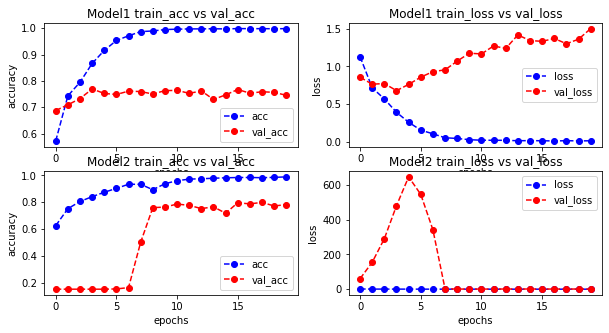

In [50]:
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(trained.history['accuracy'],'bo--', label = "acc")
    plt.plot(trained.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("Model1 train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(trained.history['loss'],'bo--', label = "loss")
    plt.plot(trained.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("Model1 train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    # Plot accuracy
    plt.subplot(223)
    plt.plot(trained2.history['accuracy'],'bo--', label = "acc")
    plt.plot(trained2.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("Model2 train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(224)
    plt.plot(trained2.history['loss'],'bo--', label = "loss")
    plt.plot(trained2.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("Model2 train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

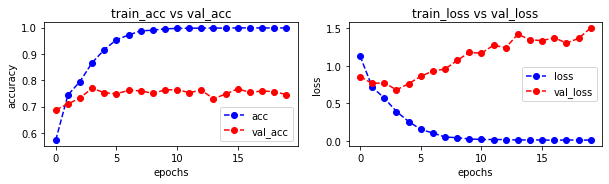

In [43]:
plot_accuracy_loss(trained)

TypeError: list indices must be integers or slices, not History

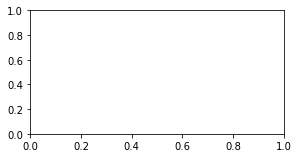

In [45]:
plot_acc_loss(models)

In [51]:
test_Images,test_Labels = get_images('./seg_test/seg_test/') #Extract the training images from the folders.

test_Images = np.array(test_Images) #converting the list of images to numpy array.
test_Images_scaled = test_Images/255
test_Labels = np.array(test_Labels)
print("Test Images shape: ",test_Images.shape)
print("Test Images (scaled) shape: ",test_Images_scaled.shape)
print("Test Labels shape: ",test_Labels.shape)

Now working on:  forest
Now working on:  buildings
Now working on:  glacier
Now working on:  street
Now working on:  mountain
Now working on:  sea
Test Images shape:  (3000, 150, 150, 3)
Test Images (scaled) shape:  (3000, 150, 150, 3)
Test Labels shape:  (3000,)


In [52]:
test_loss = model.evaluate(test_Images,test_Labels)

94/94 [==============================] - 4s 38ms/step - loss: 319.4374 - accuracy: 0.7400


In [65]:
test_loss = model.evaluate(test_Images_scaled,test_Labels)

94/94 [==============================] - 4s 39ms/step - loss: 1.4014 - accuracy: 0.7550


In [53]:
test_loss2 = model2.evaluate(test_Images,test_Labels)

94/94 [==============================] - 13s 135ms/step - loss: 157.1881 - accuracy: 0.6327


In [66]:
test_loss2 = model2.evaluate(test_Images_scaled,test_Labels)

94/94 [==============================] - 14s 148ms/step - loss: 0.9444 - accuracy: 0.7820


In [61]:
#Build 3rd Model
from tensorflow.keras import regularizers
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer='l2',input_shape = (150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu',kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax')
])

model3.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)       

In [62]:
trained3=model3.fit(Images_scaled,Labels,epochs=20,batch_size=128,validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 139s 2s/step - loss: 2.0005 - accuracy: 0.4669 - val_loss: 6.3422 - val_accuracy: 0.1974
Epoch 2/20
88/88 [==============================] - 137s 2s/step - loss: 1.4007 - accuracy: 0.6214 - val_loss: 12.8085 - val_accuracy: 0.1653
Epoch 3/20
88/88 [==============================] - 127s 1s/step - loss: 1.2331 - accuracy: 0.6853 - val_loss: 20.2668 - val_accuracy: 0.1653
Epoch 4/20
88/88 [==============================] - 119s 1s/step - loss: 1.1005 - accuracy: 0.7272 - val_loss: 17.2321 - val_accuracy: 0.2180
Epoch 5/20
88/88 [==============================] - 119s 1s/step - loss: 0.9954 - accuracy: 0.7615 - val_loss: 16.5953 - val_accuracy: 0.2316
Epoch 6/20
88/88 [==============================] - 122s 1s/step - loss: 0.9270 - accuracy: 0.7864 - val_loss: 9.1741 - val_accuracy: 0.3253
Epoch 7/20
88/88 [==============================] - 124s 1s/step - loss: 0.8811 - accuracy: 0.8021 - val_loss: 6.9457 - val_accuracy: 0.3484
Epoch 8/2

KeyboardInterrupt: 

In [63]:
#Build 4th Model
from tensorflow.keras import regularizers
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer='l2',input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer='l2'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 74, 74, 32)        128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 36, 36, 32)       

In [64]:
trained4 = model4.fit(Images_scaled,Labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 106s 1s/step - loss: 1.7806 - accuracy: 0.5329 - val_loss: 3.9491 - val_accuracy: 0.1521
Epoch 2/20
88/88 [==============================] - 90s 1s/step - loss: 0.9140 - accuracy: 0.7538 - val_loss: 5.6703 - val_accuracy: 0.1521
Epoch 3/20
88/88 [==============================] - 88s 1s/step - loss: 0.6657 - accuracy: 0.8257 - val_loss: 6.3666 - val_accuracy: 0.1525
Epoch 4/20
88/88 [==============================] - 91s 1s/step - loss: 0.5169 - accuracy: 0.8748 - val_loss: 5.0625 - val_accuracy: 0.2412
Epoch 5/20
88/88 [==============================] - 91s 1s/step - loss: 0.3664 - accuracy: 0.9249 - val_loss: 5.1287 - val_accuracy: 0.3107
Epoch 6/20
88/88 [==============================] - 92s 1s/step - loss: 0.2739 - accuracy: 0.9483 - val_loss: 5.1482 - val_accuracy: 0.3064
Epoch 7/20
88/88 [==============================] - 91s 1s/step - loss: 0.2327 - accuracy: 0.9595 - val_loss: 1.7964 - val_accuracy: 0.5786
Epoch 8/20
88/88 [=

In [67]:

test_loss4 = model4.evaluate(test_Images_scaled,test_Labels)

94/94 [==============================] - 7s 76ms/step - loss: 1.4084 - accuracy: 0.7430


In [68]:
#Build 5th Model
from tensorflow.keras import regularizers
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer='l2',input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', kernel_regularizer='l2'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(6, activation='softmax')
])

model5.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 74, 74, 32)        128       
_________________________________________________________________
dropout_27 (Dropout)         (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 36, 36, 32)      

In [69]:
trained5 = model5.fit(Images_scaled,Labels,batch_size=128,epochs=20,validation_split=0.2)

Epoch 1/20
88/88 [==============================] - 112s 1s/step - loss: 1.6675 - accuracy: 0.5556 - val_loss: 7.6256 - val_accuracy: 0.1521
Epoch 2/20
88/88 [==============================] - 99s 1s/step - loss: 0.9167 - accuracy: 0.7543 - val_loss: 8.2711 - val_accuracy: 0.1528
Epoch 3/20
88/88 [==============================] - 94s 1s/step - loss: 0.6915 - accuracy: 0.8174 - val_loss: 7.9628 - val_accuracy: 0.2059
Epoch 4/20
88/88 [==============================] - 94s 1s/step - loss: 0.5392 - accuracy: 0.8603 - val_loss: 6.5876 - val_accuracy: 0.2447
Epoch 5/20
88/88 [==============================] - 95s 1s/step - loss: 0.4298 - accuracy: 0.9003 - val_loss: 3.7141 - val_accuracy: 0.3124
Epoch 6/20
88/88 [==============================] - 95s 1s/step - loss: 0.3128 - accuracy: 0.9384 - val_loss: 3.2154 - val_accuracy: 0.4318
Epoch 7/20
88/88 [==============================] - 95s 1s/step - loss: 0.2627 - accuracy: 0.9495 - val_loss: 3.2025 - val_accuracy: 0.4243
Epoch 8/20
88/88 [=

In [70]:
test_loss5 = model5.evaluate(test_Images_scaled,test_Labels)

94/94 [==============================] - 8s 84ms/step - loss: 1.2595 - accuracy: 0.7523


In [71]:
predictions = model2.predict(test_Images_scaled)

In [75]:
pred_labels = np.argmax(predictions,axis=1)

In [76]:
pred_labels.shape

(3000,)

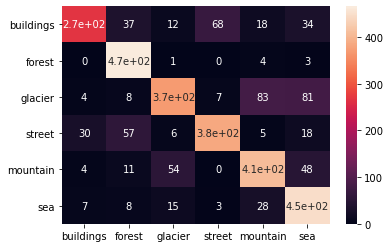

In [80]:
conf_mat = CM(test_Labels,pred_labels)
import seaborn as sns
sns.heatmap(conf_mat,annot=True,xticklabels=class_labels,yticklabels=class_labels)



In [82]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [83]:
model_vgg = VGG16(weights='imagenet',include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [84]:
train_features = model_vgg.predict(Images_scaled)
test_features = model_vgg.predict(test_Images_scaled)

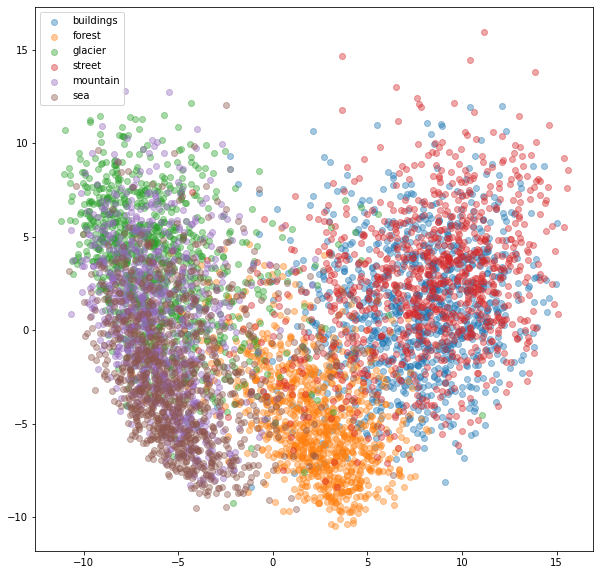

In [90]:
n_train,x,y,z = train_features.shape
n_test,x,y,z = test_features.shape

num_features = x*y*z

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)

XX = train_features.reshape(n_train,num_features)

pca.fit(XX)

C = pca.transform(XX)

C1 = C[:,0]
C2 = C[:,1]

plt.subplots(figsize=(10,10))
for i,class_name in enumerate(class_labels):
    plt.scatter(C1[Labels==i][:1000],C2[Labels==i][:1000],label=class_name,alpha=0.4)
plt.legend()
plt.show()
    


In [91]:
print(num_features)

8192


In [93]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model6.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model6.summary()
trained6 = model6.fit(train_features, Labels, batch_size=128, epochs=20, validation_split = 0.2)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 774       
Total params: 1,049,478
Trainable params: 1,049,478
Non-trainable params: 0
_________________________________________________________________


In [94]:
trained6 = model6.fit(train_features, Labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
88/88 [==============================] - 1s 7ms/step - loss: 0.8288 - accuracy: 0.7140 - val_loss: 0.3500 - val_accuracy: 0.8789
Epoch 2/20
88/88 [==============================] - 1s 6ms/step - loss: 0.2689 - accuracy: 0.9054 - val_loss: 0.3134 - val_accuracy: 0.8899
Epoch 3/20
88/88 [==============================] - 1s 6ms/step - loss: 0.2222 - accuracy: 0.9187 - val_loss: 0.3230 - val_accuracy: 0.8814
Epoch 4/20
88/88 [==============================] - 1s 6ms/step - loss: 0.1766 - accuracy: 0.9372 - val_loss: 0.3168 - val_accuracy: 0.8885
Epoch 5/20
88/88 [==============================] - 1s 6ms/step - loss: 0.1388 - accuracy: 0.9530 - val_loss: 0.3103 - val_accuracy: 0.8938
Epoch 6/20
88/88 [==============================] - 1s 6ms/step - loss: 0.1155 - accuracy: 0.9650 - val_loss: 0.3608 - val_accuracy: 0.8750
Epoch 7/20
88/88 [==============================] - 1s 6ms/step - loss: 0.1041 - accuracy: 0.9675 - val_loss: 0.3652 - val_accuracy: 0.8771
Epoch 8/20
88/88 [==

In [96]:
test_loss6 = model6.evaluate(test_features,test_Labels)

94/94 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8803


In [99]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(6, activation='softmax')
])

model7.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model7.summary()

trained7 = model7.fit(train_features, Labels, batch_size=128, epochs=20, validation_split = 0.2)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 128)               1048704   
_________________________________________________________________
batch_normalization_32 (Batc (None, 128)               512       
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 6)                 774       
Total params: 1,049,990
Trainable params: 1,049,734
Non-trainable params: 256
_________________________________________________________________
Epoch 1/20
88/88 [==============================] - 1s 8ms/step - loss: 0.5750 - accuracy: 0.7932 - val_los

In [100]:
test_loss7 = model7.evaluate(test_features,test_Labels)

94/94 [==============================] - 0s 1ms/step - loss: 0.7637 - accuracy: 0.8160


In [101]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

# local_weights_file = '/kaggle/input/inceptionv3/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
     layer.trainable = False
        
pre_trained_model.summary()

87916544/87910968 [==============================] - 2s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_33 (BatchNo (None, 74, 74, 32)   96          conv2d_22[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization_33[0][0]     
______________________

In [103]:
last_layer = pre_trained_model.get_layer('mixed7')
print("Last Layer (mixed7) shape: ",last_layer.output_shape)
last_output = last_layer.output

Last Layer (mixed7) shape:  (None, 7, 7, 768)


In [111]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)

In [112]:

from tensorflow.keras import Model
model = Model(pre_trained_model.input,x)

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

trained8 = model.fit(Images_scaled,Labels,batch_size=128,epochs=3,validation_data=(test_Images_scaled,test_Labels))

Epoch 1/3
110/110 [==============================] - 157s 1s/step - loss: 0.5503 - acc: 0.8161 - val_loss: 0.2679 - val_acc: 0.9070
Epoch 2/3
110/110 [==============================] - 151s 1s/step - loss: 0.1703 - acc: 0.9442 - val_loss: 0.2905 - val_acc: 0.8987
Epoch 3/3
110/110 [==============================] - 148s 1s/step - loss: 0.0854 - acc: 0.9756 - val_loss: 0.2863 - val_acc: 0.8973


In [116]:
test_loss8 = model.evaluate(test_Images_scaled,test_Labels)

94/94 [==============================] - 24s 254ms/step - loss: 0.2863 - acc: 0.8973
